# Univariate and Multivariate Linear Regression

In this exercise, linear regression must be implemented with a single feature and with multiple features.

*This exercise is from Andrew Ng's Machine Learning course on Coursera*

## Univariate Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Load the data and prepare the matrices

In [2]:
datafile = 'data/ex1data1.txt'
cols = np.loadtxt(datafile, delimiter = ',', usecols = (0, 1), unpack = True)

X = np.transpose(np.array(cols[0:1]))
y = np.transpose(np.array(cols[-1:]))

m = y.size

X = np.insert(X, 0, 1, axis = 1)

#Preview the matrices to make sure everything is good
print(X[:5])
print(y[:5])

[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]]
[[17.592 ]
 [ 9.1302]
 [13.662 ]
 [11.854 ]
 [ 6.8233]]


### Plot the data

Text(0.5,0,'Population of City in 10,000s')

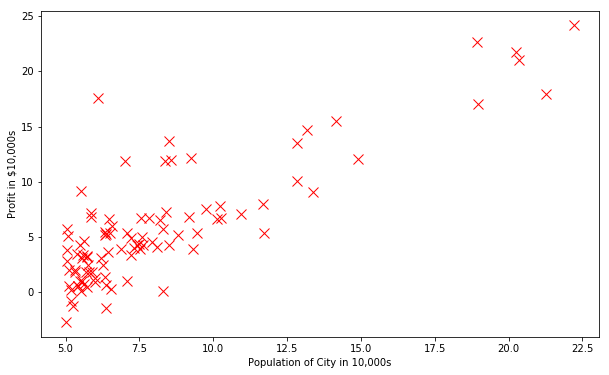

In [3]:
plt.figure(figsize = (10, 6))
plt.plot(X[:,1], y[:,0], 'rx', markersize = 10)
plt.grid(False)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

### Gradient Descent

In [4]:
iterations = 1500
alpha = 0.01

In [5]:
def h(theta, X):
    return np.dot(X, theta)

def costFunc(someTheta, X, y):
    return float((1./(2*m)) * np.dot((h(someTheta, X) - y).T, (h(someTheta, X) - y)))


It is known that if theta is initialized with 0, the cost function should be equal to 32.07. Let's make sure that the implementation is correct.

In [6]:
theta_initial = np.zeros((X.shape[1], 1))
print(costFunc(theta_initial, X, y))

32.07273387745567


In [7]:
def gradientDescent(X, theta_init = np.zeros(2)):
    
    theta = theta_init
    cost = [] #Used to plot cost as function of iteration
    thetas = [] #Used to visualize the minimization path later on
    for each in range(iterations):
        
        tempTheta = theta
        cost.append(costFunc(theta,X,y))
        thetas.append(list(theta[:,0]))
        
        for j in range(len(tempTheta)):
            tempTheta[j] = theta[j] - (alpha/m)*np.sum((h(initial_theta,X) - y)*np.array(X[:,j]).reshape(m,1))
            
        theta = tempTheta
        
    return theta, thetas, cost  

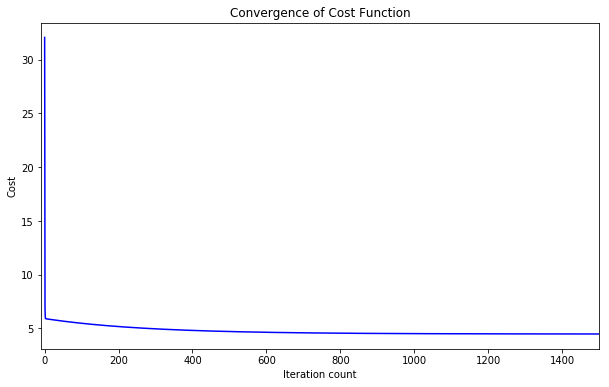

In [8]:
initial_theta = np.zeros((X.shape[1],1))
theta, thetas, cost = gradientDescent(X,initial_theta)

def plotConvergence(cost):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(cost)),cost,'b')
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration count")
    plt.ylabel("Cost")
    plt.xlim([-10, 1500])


plotConvergence(cost)

### Plot the line obtained from linear regression

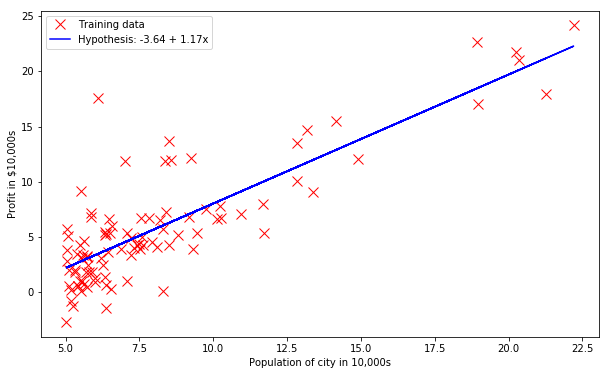

In [9]:
def linReg(x):
    return theta[0] + theta[1] * x

plt.figure(figsize = (10, 6))
plt.plot(X[:,1], y[:,0], 'rx', markersize = 10, label = 'Training data')
plt.plot(X[:,1], linReg(X[:,1]), 'b-', label = 'Hypothesis: %0.2f + %0.2fx'%(theta[0], theta[1]))
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of city in 10,000s')
plt.legend()

### Visualizing gradient descent

In [10]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

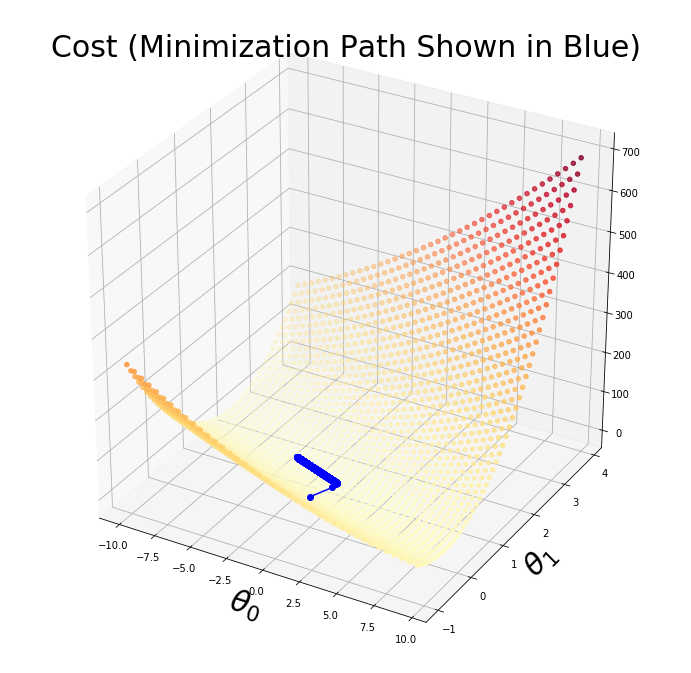

In [11]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []

for each_x in xvals:
    for each_y in yvals:
        myxs.append(each_x)
        myys.append(each_y)
        myzs.append(costFunc(np.array([[each_x], [each_y]]),X,y))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('YlOrRd'))

plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)
plt.plot([x[0] for x in thetas],[x[1] for x in thetas],cost,'bo-')
plt.show()

## Multivariate Linear Regression

In [12]:
datafile2 = 'data/ex1data2.txt'
cols2 = np.loadtxt(datafile2, delimiter = ',', usecols = (0, 1, 2), unpack = True)

X = np.transpose(np.array(cols2[:-1]))
y = np.transpose(np.array(cols2[-1:]))

m = y.size

X = np.insert(X, 0, 1, axis = 1)

print(m)
print(X[:5])
print(y[:5])

47
[[1.000e+00 2.104e+03 3.000e+00]
 [1.000e+00 1.600e+03 3.000e+00]
 [1.000e+00 2.400e+03 3.000e+00]
 [1.000e+00 1.416e+03 2.000e+00]
 [1.000e+00 3.000e+03 4.000e+00]]
[[399900.]
 [329900.]
 [369000.]
 [232000.]
 [539900.]]


### Feature normalization

In [13]:
feat_means, feat_stds = [], []

Xnorm = X.copy()

for i in range(Xnorm.shape[1]):
    
    feat_means.append(np.mean(Xnorm[:,i]))
    feat_stds.append(np.std(Xnorm[:,i]))
    
    if not i: continue
        
    Xnorm[:,i] = (Xnorm[:,i] - feat_means[-1]) / feat_stds[-1]

### Gradient descent

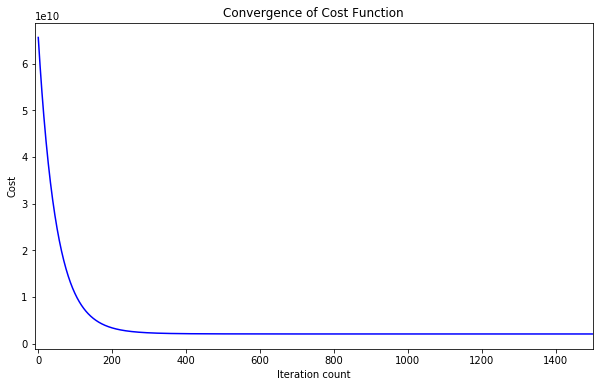

In [14]:
initial_theta = np.zeros((Xnorm.shape[1], 1))
theta, thetas, cost = gradientDescent(Xnorm, initial_theta)

plotConvergence(cost)

In [15]:
#print "Final result theta parameters: \n",theta
print ("Check of result: What is price of house with 1650 square feet and 3 bedrooms?")
ytest = np.array([1650.,3.])
#To "undo" feature normalization, we "undo" 1650 and 3, then plug it into our hypothesis
ytestscaled = [(ytest[x]-feat_means[x+1])/feat_stds[x+1] for x in range(len(ytest))]
ytestscaled.insert(0,1)
print ("$%0.2f" % float(h(theta,ytestscaled)))

Check of result: What is price of house with 1650 square feet and 3 bedrooms?
$293098.15


### Solve with normal equation

In [16]:
from numpy.linalg import inv
#Implementation of normal equation to find analytic solution to linear regression
def normEqtn(X,y):
    #restheta = np.zeros((X.shape[1],1))
    return np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y)

In [17]:
print ("Normal equation prediction for price of house with 1650 square feet and 3 bedrooms")
print ("$%0.2f" % float(h(normEqtn(X,y),[1,1650.,3])))

Normal equation prediction for price of house with 1650 square feet and 3 bedrooms
$293081.46


## Practical Univariate Linear Regression Implementation

In [18]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [19]:
datafile = 'data/ex1data1.txt'
cols = np.loadtxt(datafile, delimiter = ',', usecols = (0, 1), unpack = True)

X = np.transpose(np.array(cols[0:1]))
y = np.transpose(np.array(cols[-1:]))

dataframe_X = pd.DataFrame(X)
dataframe_y = pd.DataFrame(y)

# Split data into training and testing sets (usually 80:20)
df_X_train = dataframe_X[:-20]
df_X_test = dataframe_X[-20:]

# Split target feature into training and testing test as well
df_y_train = dataframe_y[:-20]
df_y_test = dataframe_y[-20:]

In [20]:
regr = linear_model.LinearRegression()

# Train model using the training sets
regr.fit(df_X_train, df_y_train)

# Make predictions using the testing sets
profit_pred = regr.predict(df_X_test)

In [21]:
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('Mean squared error: %.2f' % mean_squared_error(df_y_test, profit_pred))

Coefficients: 
 [[1.19367575]]
Intercept: 
 [-3.63963925]
Mean squared error: 6.59


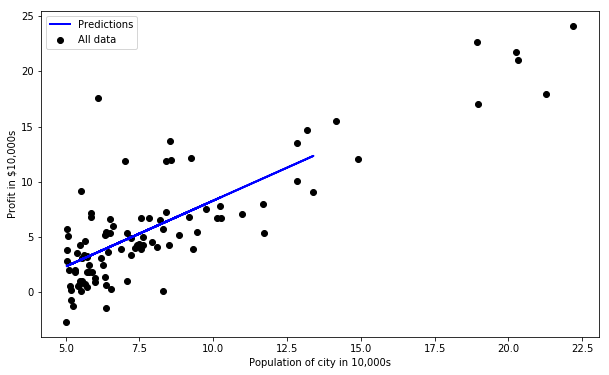

In [22]:
plt.figure(figsize = (10, 6))
plt.scatter(dataframe_X, dataframe_y, color = 'black', label = 'All data')
plt.plot(df_X_test, profit_pred, color = 'blue', linewidth = 2, label = 'Predictions')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of city in 10,000s')
plt.legend()

plt.show()

## Practical Multivariate Linear Regression Implementation

In [58]:
from sklearn.linear_model import Ridge

datafile2 = 'data/ex1data2.txt'
cols2 = np.loadtxt(datafile2, delimiter = ',', usecols = (0, 1, 2), unpack = True)

X = np.transpose(np.array(cols2[:-1]))
y = np.transpose(np.array(cols2[-1:]))

df_X = pd.DataFrame(X)
df_y = pd.DataFrame(y)

# Split data into training and testing sets (usually 80:20)
df_X_train = df_X[:-20]
df_X_test = df_X[-20:]

# Split target feature into training and testing test as well
df_y_train = df_y[:-20]
df_y_test = df_y[-20:]

# Model
clf = Ridge(alpha = 1.0, fit_intercept = True, normalize = True, solver = 'auto')

clf.fit(df_X_train, df_y_train)

predictions = clf.predict(df_X_test)

print(clf.score(df_X_train, df_y_train))
print('Coefficients: \n', clf.coef_)
print('Intercept: \n', clf.intercept_)
print('Mean squared error: %.2f' % mean_squared_error(df_y_test, predictions))

0.6139989992701311
Coefficients: 
 [[   65.37224741 32492.86656842]]
Intercept: 
 [111156.26282288]
Mean squared error: 5752233877.28
